In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import warnings
import statsmodels.formula.api as smf
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn import linear_model

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

#Display Warnings
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [18]:
# Retrieve, upload and review the data
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


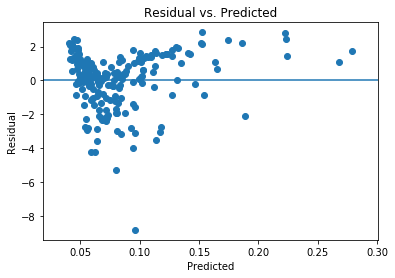

In [19]:
#The right multivariate non-normality. 
columns = list(data[['TV','Radio','Newspaper']].columns)
for column in columns: 
    q75 = data[column].quantile(0.75)
    q25 = data[column].quantile(0.25)
    iqr = q75 - q25
    max = q75 + (iqr * 1.5)
    data=data.where(data[column] < max)

#The right heteroscedasticity.
inv_predicted = [1/x for x in predicted]
plt.scatter(inv_predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()